# Checking ML Results

There are a lot of different techniques for ML, we're only focusing on a few.

The techniques you use and the features you select have a very strong impact on the accuracy of your results.




In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.cross_validation import train_test_split

In [4]:
%matplotlib inline

## Overfitting and underfitting

_Overfitting_ - when your model predicts your _training data_ very well, but then performs less well on new data that's introduced. It can happen if you use too many polynomial degrees, it could happen if you consider too many features, basically skewing the model toward your specific subset of data that doesn't actually reflect the trends of the overall population.

_Underfitting_ - when your model doesn't predict very well

Let's take a look at both of these with the ATUS data. We'll use Linear Regression and Polynomial Degrees because we've covered them already.

In [6]:
summary = pd.read_csv('atussum_2014.dat')

sleep_data = summary[['TUFINLWGT', 'TEAGE', 'TESEX', 't010101']]

In [9]:
sleep_data = sleep_data.rename(columns={'TUFINLWGT':'weight', 'TEAGE':'age', 'TESEX':'sex', 't010101':'minutes'})

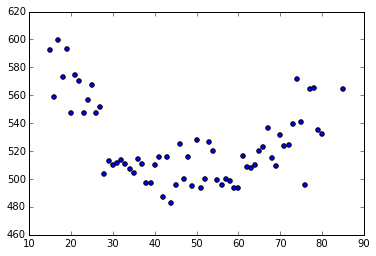

In [17]:
sleep_data['weighted_minutes'] = sleep_data.weight * sleep_data.minutes

sleep_by_age = sleep_data.groupby('age').sum()
sleep_by_age['mean_minutes'] = sleep_by_age.weighted_minutes / sleep_by_age.weight

# sleep_by_age.plot(kind='scatter', x=sleep_by_age.index, y='mean_minutes')
plt.scatter(x=sleep_by_age.index, y=sleep_by_age.mean_minutes)

In [30]:
X = sleep_by_age.index.values.reshape((-1, 1))
y = sleep_by_age.mean_minutes.values

In [32]:
X[:5]

array([[15],
       [16],
       [17],
       [18],
       [19]])

In [33]:
y[:5]

array([ 592.18134232,  558.42885178,  599.88738826,  573.26575319,
        593.40292279])

In [43]:
# the train_test_split function takes a big old set of data and splits it into
# training and test data

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=101)

In [44]:
test_X

array([[70],
       [80],
       [41],
       [45],
       [71],
       [36],
       [32],
       [17],
       [31],
       [76],
       [42],
       [40],
       [18],
       [85],
       [51],
       [16],
       [50]])

We've split our data into training and test data, we should now use the training data to come up with a fit, and then compare the results from our model to the test data and see how our R^2 score changes

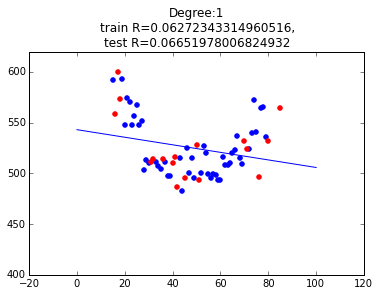

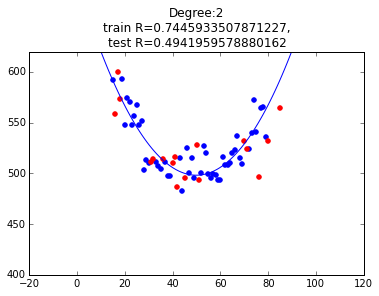

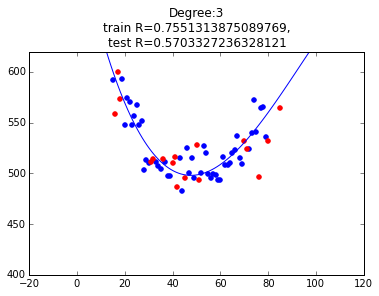

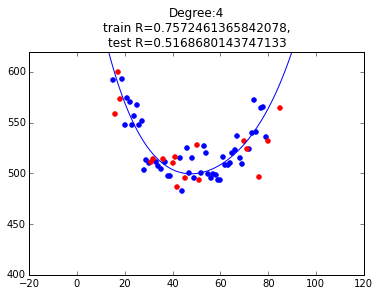

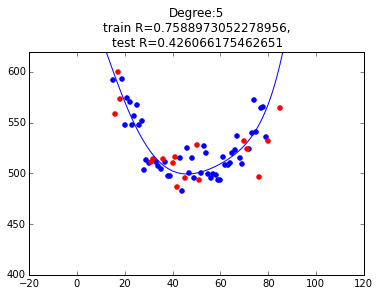

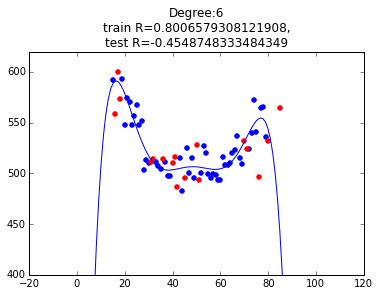

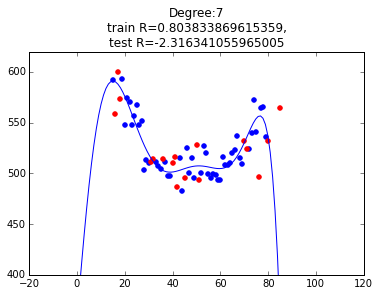

In [56]:

for degree in range(1, 8):
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                      ('linear', LinearRegression())])

    model = model.fit(train_X, train_y)

    fn = lambda x: model.predict(x)[0]

    plt.scatter(train_X, train_y, color='b')
    plt.scatter(test_X, test_y, color='r')
    xs = np.linspace(0, 100, 100)
    plt.plot(xs, [fn(x) for x in xs])
    plt.ylim(ymin=400, ymax=620)

    r_training = model.score(train_X, train_y)
    r_test = model.score(test_X, test_y)

    plt.title('Degree:{}\ntrain R={},\ntest R={}'.format(degree, r_training, r_test))
    plt.show()

In [49]:
model.predict(50)

array([ 524.41549858])

## About score

All the scikit-learn models have a .score method. They don't all necessarily us $$R^2$$ to do their calculations, but they can all be used to get a relative view of the accuracy of the model given a set of data

# Bias and variance

http://scott.fortmann-roe.com/docs/BiasVariance.html